<a href="https://colab.research.google.com/github/edisonc57/chislennyye-metody/blob/main/Interpolaci%C3%B3n_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-D Интерполяция

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
x= np.linspace(0,4,12)
y= np.cos(x**2/3 +4)

print (x)
print(y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ]
[-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


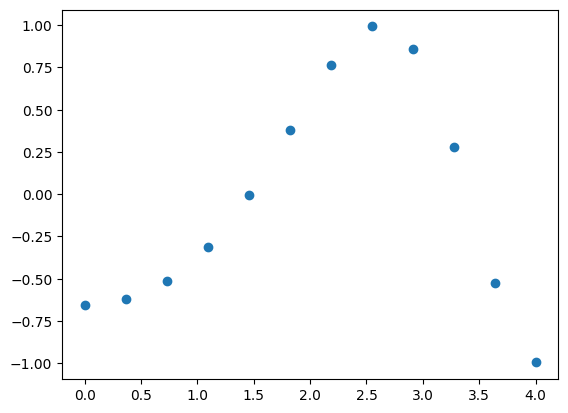

In [ ]:
plt.plot (x,y,"o")

In [ ]:
f1= interpolate.interp1d(x, y, kind= 'linear')

In [ ]:
x_new= np.linspace(0,4,30)
y_new= f1(x_new)
print(f1(1.4))

-0.052653092166339566


In [ ]:
f2= interpolate.interp1d(x,y, kind= 'cubic')
y2_new= f2(x_new)
print(f2(1.4))

-0.05901003040150796


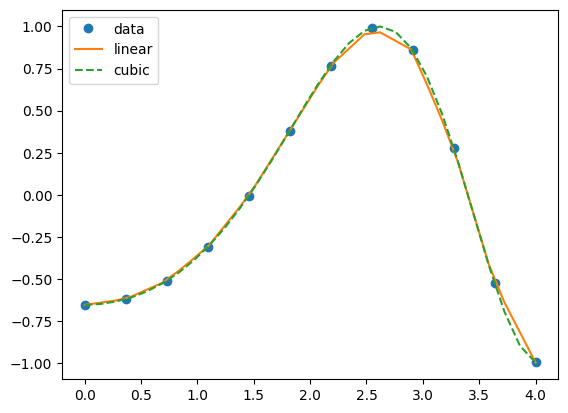

In [ ]:
plt.plot(x, y, 'o', x_new, y_new, '-', x_new, y2_new, '--')
plt.legend(['data','linear','cubic' ], loc= 2)

#Пример 1

-0.4
0.6200000000000001


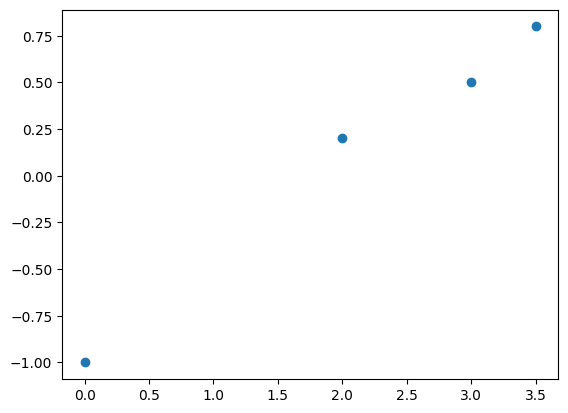

In [ ]:
#Даны экспериментальные данные
x= np.array([0 ,2 , 3, 3.5])
y= np.array([-1, 0.2, 0.5, 0.8])
f1= interpolate.interp1d(x, y, kind= 'linear')
print(f1(1))
print(f1(3.2))
plt.plot(x,y,'o')

#Пример 2

*** Интерполяционный многочлен Лагранжа***

In [ ]:
#Таблица эксперименталных данных
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
x = np.array([0, 1/6,  1/2])
y = np.sin(np.pi*x)
poly = lagrange(x, y)

In [ ]:
Polynomial(poly.coef[::-1]).coef
x_new2= np.arange(-1,4,0.5)

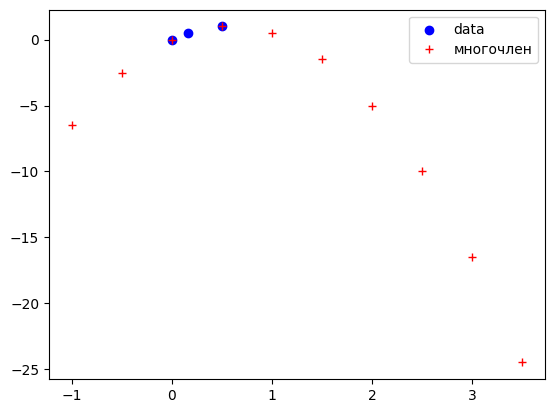

In [ ]:
plt.scatter(x,y,label='data', color= 'b')
plt.plot(x_new2, Polynomial(poly.coef[::-1])(x_new2),'+', color='r', label= 'многочлен')
plt.legend()

In [ ]:
nodos= np.array([1/4,1/3])
f_nodos= np.sin(np.pi*nodos)
print(poly(nodos))
print(f_nodos)
#print(poly(1/3))

[0.6875     0.83333333]
[0.70710678 0.8660254 ]


In [ ]:
errores_absolutos = [abs(f_nodos - poly(nodos)) ]
print(errores_absolutos)

[array([0.01960678, 0.03269207])]


#Сплайны

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [ ]:
x = np.linspace(-3, 3, 50)
print (x)